## Dataset : Airbnb Singapore Dataset from InsideAirbnb
Dataset from Airbnb : **"Singapore, 29 December 2022"**  
Source: http://insideairbnb.com/get-the-data/

### EDA on First 25 Variables in dataset  
The purpose of this file is to conduct exploratory data analysis on the first 25 variables in our dataset.  
### Done by: <b>J'sen Ong</b>

---

### Essential Libraries

Import essential libraries such as numpy, pandas, matplotlib and seaborn.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [45]:
import numpy as np
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
sb.set()

### Additional Libraries

Import additional libraries

> Wordcloud : Library to create tag clouds in Python  

In [3]:
from wordcloud import WordCloud

---
# Features Description

This dataset contains 75 features about Airbnb listings within Singapore. This notebook encompasses the cleaning & exploration <br>data analysis (EDA) of the first 25 features.
Below are the features with their respective descriptions</br>

1.  id: The unique identifier for each Airbnb listing.
2.  listing_url: The URL of the Airbnb listing.
3.  scrape_id: The unique identifier for the data scraping process.
4.  last_scraped: The date when the data was last scraped.
5.  source: The source of the data.
6.  name: The name or title of the Airbnb listing.
7.  description: The description of the Airbnb listing.
8.  neighborhood_overview: A brief overview of the neighborhood where the Airbnb listing is located.
9.  picture_url: The URL of the primary picture of the Airbnb listing.
10.  host_id: The unique identifier for the host of the Airbnb listing.
11.  host_url: The URL of the host's profile.
12.  host_name: The name of the host of the Airbnb listing.
13.  host_since: The date when the host joined Airbnb.
14.  host_location: The location of the host.
15.  host_about: A brief description of the host.
16.  host_response_time: The average response time of the host to messages.
17.  host_response_rate: The percentage of messages that the host responds to.
18.  host_acceptance_rate: The percentage of reservation requests that the host accepts.
19.  host_is_superhost: A binary variable indicating if the host is a superhost.
20.  host_thumbnail_url: The URL of the host's profile picture.
21.  host_picture_url: The URL of the host's profile picture.
22.  host_neighbourhood: The neighborhood where the host is located.
23.  host_listings_count: The number of listings that the host has.
24.  host_total_listings_count: The total number of listings that the host has, including inactive listings.
25.  host_verifications: A list of verification methods that the host has completed.

--- 
## Visual Data Cleaning 

##### In the context of maximizing host profit, the following features can be dropped from the dataset as they provide no relevant insights for our predictions.

1. **id**
2. **listing_url**
3. **scrape_id**
4. **last_scraped**
5. **source** 
6. **name**
7. **picture_url**
8. **host id** 
9. **host url** 
10. **host name** 
11. **host since** 
12. **host about** 
13. **host_thumbnail_url**
14. **host_picture_url** 
15. **host_neighbourhood**
15. **host_listing_count**
16. **host_total_listing_count**

---
### Below are features that we think might be informative for analyzing factors that impact host profit, so we shall conduct our EDA on them and gather insights:

1. **description** : The description should highlight the unique features and amenities of the listing which can help to attract more potential guests and increase bookings, thereby impacting host profit.

2. **neighborhood_overview** : Similar to description, neighborhood surrounding can be an important factor for guests.

3. **host_location** : Host's living location can impact their profit on Airbnb in certain ways, we will perform EDA on this to verify the authenticity of it.

4. **host_response time** : Hosts with faster response times may be more likely to secure bookings and receive positive reviews, which can impact host profit.

5. **host_response rate** : Similar to Host response time , hosts with higher response rates may be more likely to secure bookings and receive positive reviews, which can impact host profit.

6. **host_acceptance rate** : The percentage of guest requests that a host accepts can impact booking rates and guest satisfaction. Hosts with higher acceptance rates may be more likely to secure bookings and receive positive reviews, which can impact host profit.

7. **host_is_superhost** : The "superhost" designation on Airbnb is given to experienced and highly-rated hosts. This can be an important factor in attracting guests and increasing booking rates, which can impact host profit.

8. **host_verifications** : The amount of verification methods that host has completed might be a factor that helps a host gather more profits as the customers feel safer.

In [4]:
def remove_outliers(df, columns, factor=1.5):
    # loop through each column and remove outliers based on the IQR method
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + factor * iqr
        lower_bound = q1 - factor * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

In [5]:
def countOutliers (df):
    #Get the q1 and q3 datas to find out the 25% and 75% range, then calculate inter quartile range and then find out whiskers.
    #Then count how many points lie outside of this range.
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    #Interquartile
    iqr = q3 - q1
    #Calculate whiskers
    leftWhisker = q1 - (1.5 * iqr)
    rightWhisker = q3 + (1.5 * iqr)
    outliers = 0;
    #Loop through data now
    for data in df:
        if(data < leftWhisker or data > rightWhisker):
            outliers+=1

    return outliers

---

>## Import the Dataset

In [6]:
airDF = pd.read_csv("listings.csv")
airDF.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,71609.0,https://www.airbnb.com/rooms/71609,2.022120e+13,12/29/2022,city scrape,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,...,4.78,4.26,4.32,NaN,f,6,0,6,0,0.15
1,71896.0,https://www.airbnb.com/rooms/71896,2.022120e+13,12/29/2022,city scrape,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,...,4.43,4.17,4.04,NaN,t,6,0,6,0,0.17
2,71903.0,https://www.airbnb.com/rooms/71903,2.022120e+13,12/29/2022,city scrape,Room 2-near Airport & EXPO,"Like your own home, 24hrs access.<br /><br /><...",Quiet and view of the playground with exercise...,https://a0.muscache.com/pictures/568743/7bc623...,367042,...,4.64,4.50,4.36,NaN,f,6,0,6,0,0.33
3,275343.0,https://www.airbnb.com/rooms/275343,2.022120e+13,12/29/2022,city scrape,Amazing Room with window 10min to Redhill,Awesome location and host <br />Room near INSE...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1439258,...,4.42,4.53,4.63,S0399,f,46,2,44,0,0.19
4,275344.0,https://www.airbnb.com/rooms/275344,2.022120e+13,12/29/2022,city scrape,15 mins to Outram MRT Single Room,Lovely home for the special guest !<br /><br /...,Bus stop <br />Food center <br />Supermarket,https://a0.muscache.com/pictures/miso/Hosting-...,1439258,...,4.54,4.62,4.46,S0399,f,46,2,44,0,0.11


In [7]:
airDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3035 non-null   float64
 1   listing_url                                   3035 non-null   object 
 2   scrape_id                                     3035 non-null   float64
 3   last_scraped                                  3035 non-null   object 
 4   source                                        3035 non-null   object 
 5   name                                          3035 non-null   object 
 6   description                                   2985 non-null   object 
 7   neighborhood_overview                         1973 non-null   object 
 8   picture_url                                   3035 non-null   object 
 9   host_id                                       3035 non-null   i

In [8]:
print(airDF.dtypes)

id                                              float64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object


## 1. EDA on Description

<b>Description</b>: The description of the Airbnb listing.


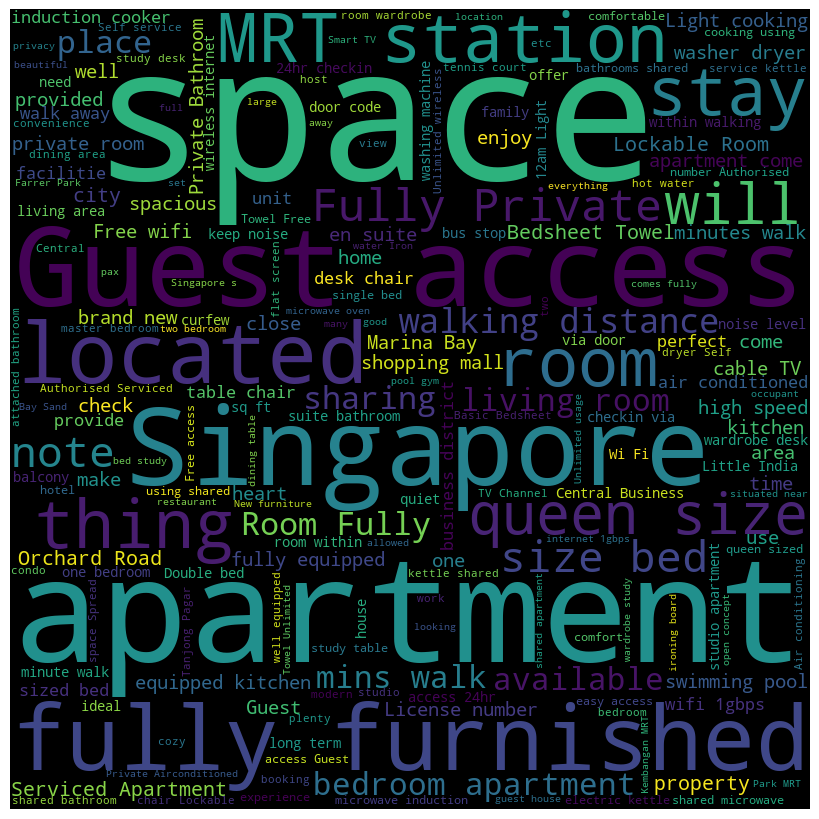

In [9]:
#Gather the description DF
descriptionDF = airDF["description"].copy();
#Make it into a text
descriptionText = " ".join(descriptionDF.astype(str))
#Declare some variables we do not want
breaks = ["<b>","</b>","<b/>","<br />","<br>"]
#Replace each letter in the text with this
for x in breaks:    
    descriptionText = descriptionText.replace(x, " ")

#Create our wordcloud 
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      min_font_size=10).generate(descriptionText)

#Plot wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


##### INSIGHTS : The Singapore Airbnb listings dataset description column's prominent use of words such as "fully furnished", "guest access", "space", "located", "MRT station", and "walking distance" reveals that there are high amount of listings that mention about walking distances near to MRT stations, and also the interior of the house.

## 2. EDA on Neighborhood_overview

<b>Neighborhood_overview</b>: A brief overview of the neighborhood where the Airbnb listing is located.

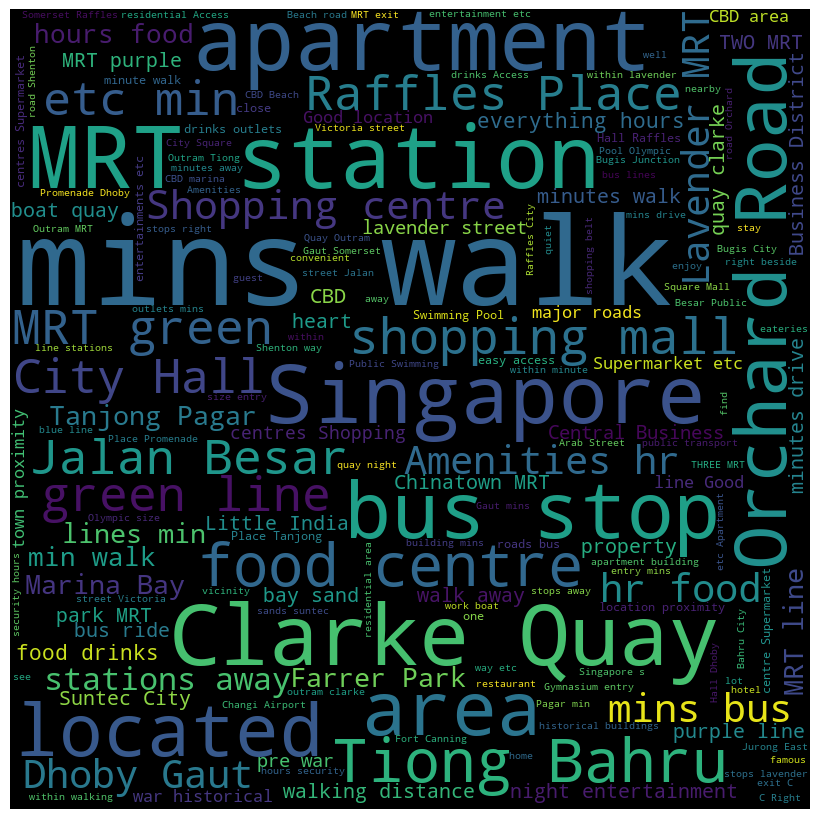

In [10]:
#Gather the neighbourhood overview DF
neighborhoodDF = airDF["neighborhood_overview"].copy()
neighborhoodText = " ".join(neighborhoodDF.astype(str))

breaks = ["<b>","</b>","<b/>","<br />","<br>", "nan"]

for x in breaks:    
    neighborhoodText = neighborhoodText.replace(x, " ")

#Create wordcloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      min_font_size=10).generate(neighborhoodText)

#Plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

##### INSIGHTS : The Singapore Airbnb listings dataset neighbourhood_overview column's prominent use of words such as "MRT station", "mins walk" , "bus stop", "Raffles Place", "Orchard Road", "Green Line" , "Clarke Quay" and "food centre", it can be inferred that a higher proportion of listings are near the central region of Singapore, and are also within walking distance to the MRT station specifically East-West-Line (green line)

---
### 3. EDA on host_location

<b>host_location</b>: The location of the host.

In [11]:
#Make our host location DF
locationDF = airDF["host_location"].copy()
locationDF

0       Singapore
1       Singapore
2       Singapore
3       Singapore
4       Singapore
          ...    
3030          NaN
3031          NaN
3032    Singapore
3033    Singapore
3034          NaN
Name: host_location, Length: 3035, dtype: object

In [12]:
locationDF.describe()

count          2035
unique           39
top       Singapore
freq           1832
Name: host_location, dtype: object

In [13]:
#Drop the null values
locationData = locationDF.dropna()
numberOfEntries = locationData.count()
print("Number of entries in dataset:{0}\nNumber of valid entries:{1}\nNumber of invalid entries:{2}".format(len(airDF),numberOfEntries,len(airDF)-numberOfEntries))

Number of entries in dataset:3035
Number of valid entries:2035
Number of invalid entries:1000


In [14]:
countryCount = locationData.value_counts()
countryPercentages = round(countryCount / len(locationData) * 100, 2)
countryDF = pd.DataFrame({'Count': countryCount, 'Percentage (%)': countryPercentages})
print(countryDF)

                                  Count  Percentage (%)
Singapore                          1832           90.02
Uttar Pradesh, India                106            5.21
Jakarta, Indonesia                   30            1.47
Amsterdam, Netherlands               10            0.49
France                                6            0.29
Hong Kong                             5            0.25
China                                 5            0.25
Paris, France                         4            0.20
Berlin, Germany                       2            0.10
Lower Broadheath, United Kingdom      2            0.10
San Francisco, CA                     2            0.10
Las Piñas, Philippines                2            0.10
Agadir, Morocco                       2            0.10
New York, NY                          2            0.10
Camperdown, Australia                 1            0.05
Malaysia                              1            0.05
Melbourne, Australia                  1         

Plot a count plot to visualize the counts of each host location present in the locationData

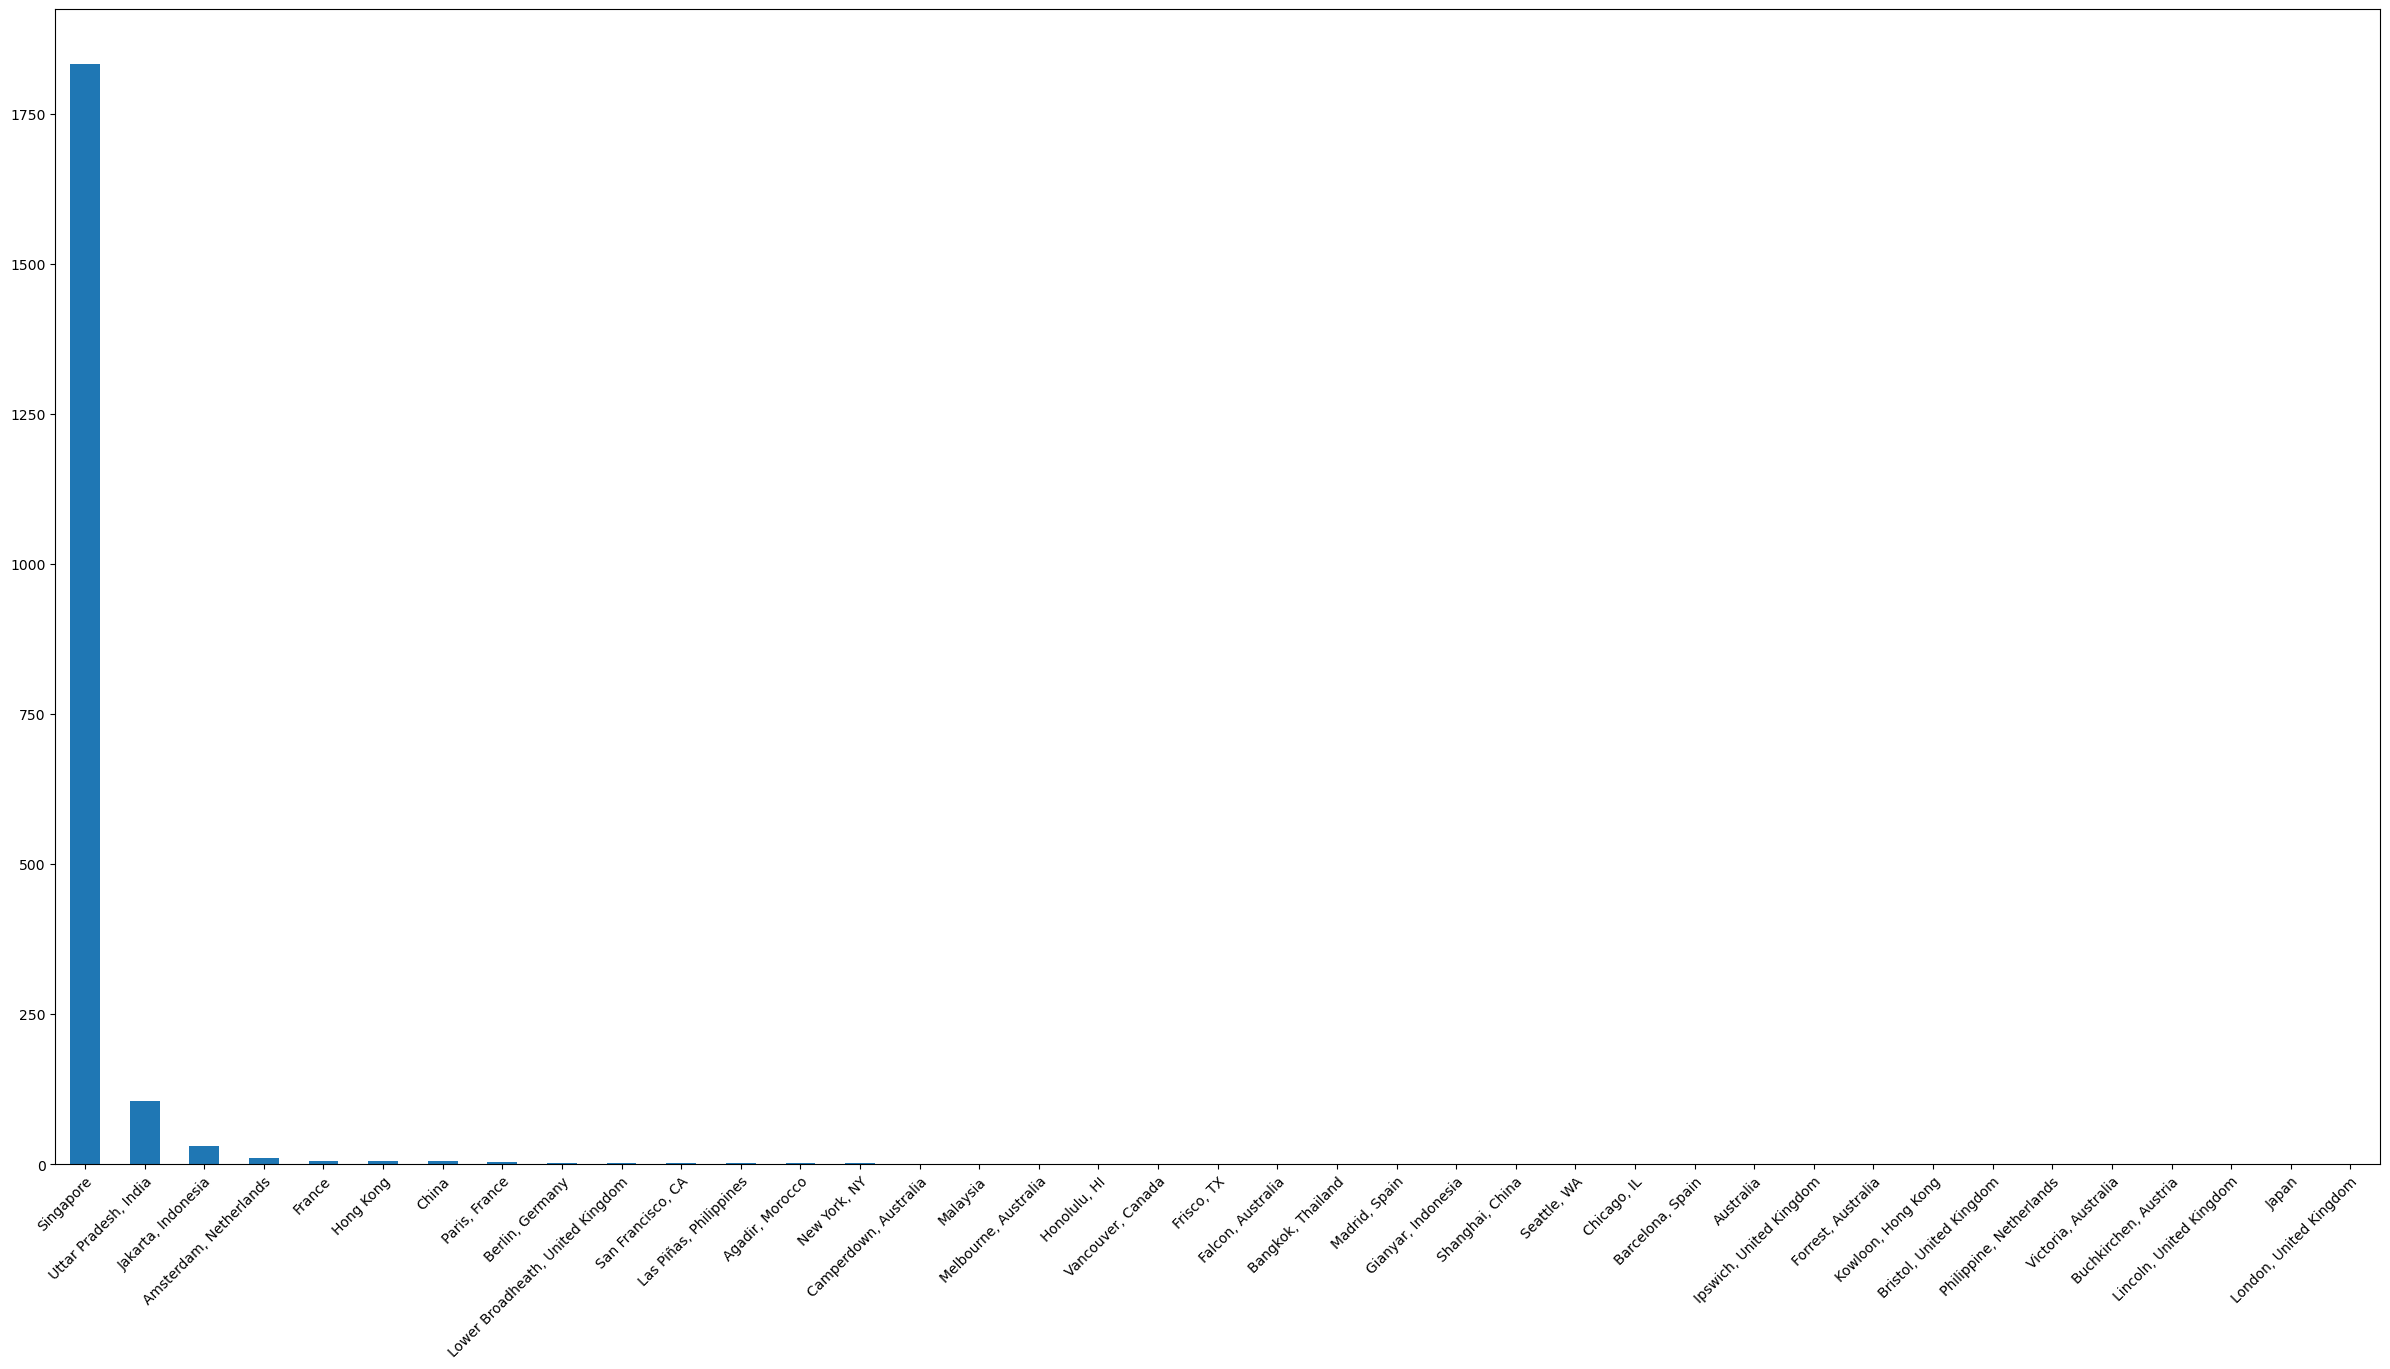

In [15]:
f= plt.figure(figsize = (30,15))
locationData.value_counts().plot(kind='bar')
plt.xticks(rotation =45, ha = "right", rotation_mode= "anchor")
plt.show()

##### INSIGHT : We will not be using host location as a predictor of profit because the dataset for host_location is highly imbalanced with 90.02% of the data occupied by <b>"Singapore"</b>.

---
### 4. EDA on host_response_time
<b>host_response_time</b>: The average response time of the host to messages.

In [16]:
hostResponseDF = airDF["host_response_time"].copy()
hostResponseDF.head()

0    within a few hours
1    within a few hours
2    within a few hours
3        within an hour
4        within an hour
Name: host_response_time, dtype: object

In [17]:
hostResponseDF.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3035 entries, 0 to 3034
Series name: host_response_time
Non-Null Count  Dtype 
--------------  ----- 
2418 non-null   object
dtypes: object(1)
memory usage: 23.8+ KB


There are 2418 non null, so we have null values. We need to drop them.

In [18]:
#There are 2418 null values
cleanedDF = hostResponseDF.dropna()
cleanedDF.describe()

count               2418
unique                 4
top       within an hour
freq                 901
Name: host_response_time, dtype: object

<AxesSubplot:xlabel='host_response_time', ylabel='Count'>

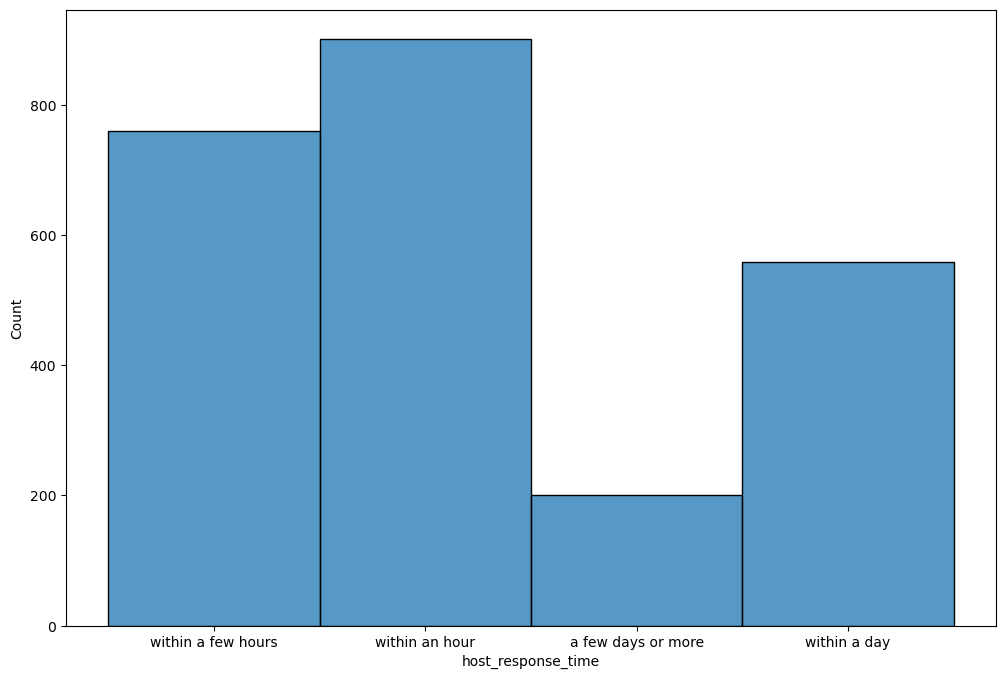

In [19]:
f = plt.figure(figsize=(12,8))
sb.histplot(data = cleanedDF)

In [20]:
#Calculate percentages of host for each bin
cleanedDF.value_counts()

within an hour        901
within a few hours    759
within a day          558
a few days or more    200
Name: host_response_time, dtype: int64

In [21]:
length = len(cleanedDF)
#Print the percentages
print("Within an hour: ", round((901/length) * 100,2), "%", sep = "")
print("Within a few hours: ", round((759/length) * 100,2), "%", sep = "")
print("Within a day: ", round((558/length) * 100,2), "%", sep = "")
print("A few days or more: ", round((200/length) * 100,2), "%", sep = "")

Within an hour: 37.26%
Within a few hours: 31.39%
Within a day: 23.08%
A few days or more: 8.27%


##### INSIGHT: We can observe that majority of the hosts has a response time of within an hour, with 901 hosts replying within an hour. Generally, about 91.73% of hosts reply within a day.

---
### Try to find relationship between host_response_time and number_of_reviews
<b>host_response_time</b>: The average response time of the host to messages.  
<b>number_of_reviews</b>: The amount of reviews a host has.  

Let us see if there's a relation between a host's response time to the number of reviews he has. I will not compare host response time and host's review rating as the sample size might be too low to draw any benefitting conclusion. For example, if a host received a 5.0 rating from 1 person, it cannot be compared equally with another who has for e.g 4.5 rating (mean) by 10 people.

In [22]:
responseTimeReviewsDF = airDF[["host_response_time","number_of_reviews"]]
responseTimeReviewsDF = responseTimeReviewsDF.dropna(how = "any")
responseTimeReviewsDF.describe()

,number_of_reviews
count,2418.000000
mean,10.301902
std,30.403844
min,0.000000
25%,0.000000
50%,1.000000
75%,5.000000
max,369.000000


In [23]:
# group the data by host_response_time and calculate the mean for number_of_reviews
mean_reviews_by_response_time = responseTimeReviewsDF.groupby('host_response_time')['number_of_reviews'].mean()

# print the results
print("Mean number of reviews by host response time:")
print(mean_reviews_by_response_time)

Mean number of reviews by host response time:
host_response_time
a few days or more     7.365000
within a day           9.016129
within a few hours     8.063241
within an hour        13.635960
Name: number_of_reviews, dtype: float64


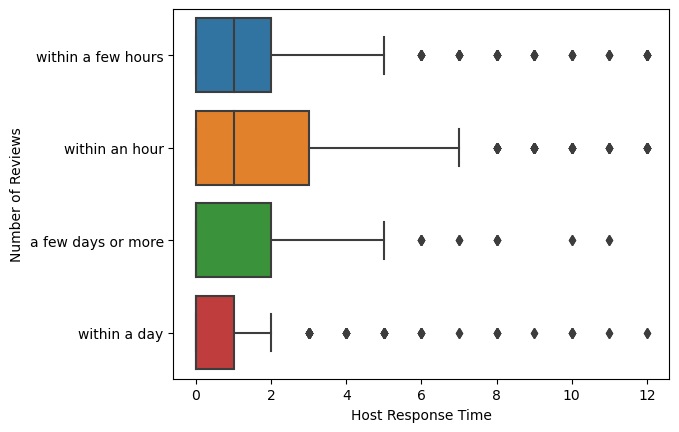

In [24]:
#remove outliers
responsetimereviews_df = remove_outliers(responseTimeReviewsDF,["number_of_reviews"])

# create a box plot
sb.boxplot(y='host_response_time', x='number_of_reviews', data=responsetimereviews_df)
plt.xlabel('Host Response Time')
plt.ylabel('Number of Reviews')
plt.show()

#### Generally, we can see that as users reply within a few hours, they will get more reviews.

---
### 5. EDA on host_response_rate
<b>host_response_rate</b>: The percentage of messages that the host responds to.


In [25]:
responseRateDF = pd.DataFrame(airDF["host_response_rate"])
responseRateDF

,host_response_rate
0,90%
1,90%
2,90%
3,100%
4,100%
...,...
3030,100%
3031,100%
3032,NaN
3033,100%


In [26]:
responseRateDF.describe()

,host_response_rate
count,2418
unique,30
top,100%
freq,1202


In [27]:
#Find the number of null values as there seems to be alot.
print("Total Values: {0}, Null Values: {1}".format(len(responseRateDF), responseRateDF.isna().sum().sum()))

Total Values: 3035, Null Values: 617


In [28]:
#Drop null values
responseRateDF = responseRateDF.dropna()
responseRateDF

,host_response_rate
0,90%
1,90%
2,90%
3,100%
4,100%
...,...
3028,97%
3029,97%
3030,100%
3031,100%


In [29]:
#The type of this column is in %, so we shall calculate and populate back as floats
cleanedDF = pd.DataFrame(responseRateDF["host_response_rate"])
cleanedDF["host_response_rate"] = responseRateDF["host_response_rate"].str.replace('%', '', regex= True).astype(float)
cleanedDF

,host_response_rate
0,90.0
1,90.0
2,90.0
3,100.0
4,100.0
...,...
3028,97.0
3029,97.0
3030,100.0
3031,100.0


In [30]:
cleanedDF.describe()

,host_response_rate
count,2418.000000
mean,86.698098
std,26.126784
min,0.000000
25%,90.000000
50%,98.000000
75%,100.000000
max,100.000000


<AxesSubplot:>

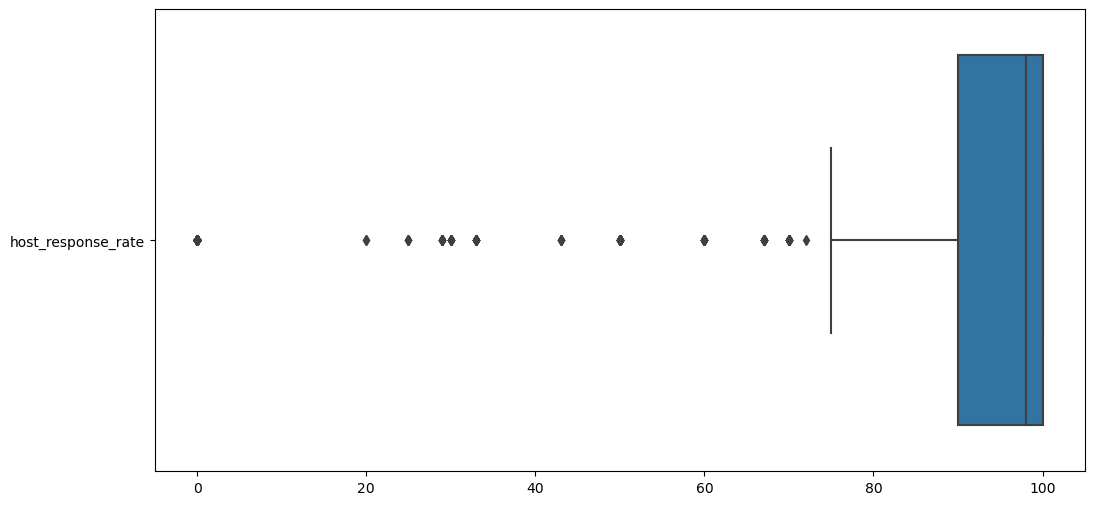

In [31]:
#Plot out the distributions of host response rate
f = plt.figure(figsize=(12,6))
sb.boxplot(data = cleanedDF, orient = 'h')

INSIGHTS : Generally, we can see that most of the hosts have a high response rate, with a median of 98%, with some outliers.

---
### 6. EDA on host_acceptance_rate
<b>host_acceptance_rate</b>: The percentage of reservation requests that the host accepts.


In [32]:
acceptanceRateDF = pd.DataFrame(airDF["host_acceptance_rate"])
acceptanceRateDF

,host_acceptance_rate
0,100%
1,100%
2,100%
3,85%
4,85%
...,...
3030,100%
3031,NaN
3032,NaN
3033,60%


In [33]:
acceptanceRateDF.describe()

,host_acceptance_rate
count,2297
unique,51
top,100%
freq,649


In [34]:
#Find the number of null values as there seems to be alot.
print("Total Values: {0}, Null Values: {1}".format(len(acceptanceRateDF), acceptanceRateDF.isna().sum().sum()))

Total Values: 3035, Null Values: 738


In [35]:
#Drop null values
acceptanceRateDF = acceptanceRateDF.dropna()
acceptanceRateDF

,host_acceptance_rate
0,100%
1,100%
2,100%
3,85%
4,85%
...,...
3027,97%
3028,97%
3029,97%
3030,100%


In [36]:
#The type of this column is in %, so we shall calculate and populate back as floats
cleanedDF = pd.DataFrame(acceptanceRateDF["host_acceptance_rate"])
cleanedDF["host_acceptance_rate"] = acceptanceRateDF["host_acceptance_rate"].str.replace('%', '', regex= True).astype(float)
cleanedDF

,host_acceptance_rate
0,100.0
1,100.0
2,100.0
3,85.0
4,85.0
...,...
3027,97.0
3028,97.0
3029,97.0
3030,100.0


In [37]:
cleanedDF.describe()

,host_acceptance_rate
count,2297.000000
mean,71.505007
std,33.333144
min,0.000000
25%,49.000000
50%,88.000000
75%,100.000000
max,100.000000


<AxesSubplot:>

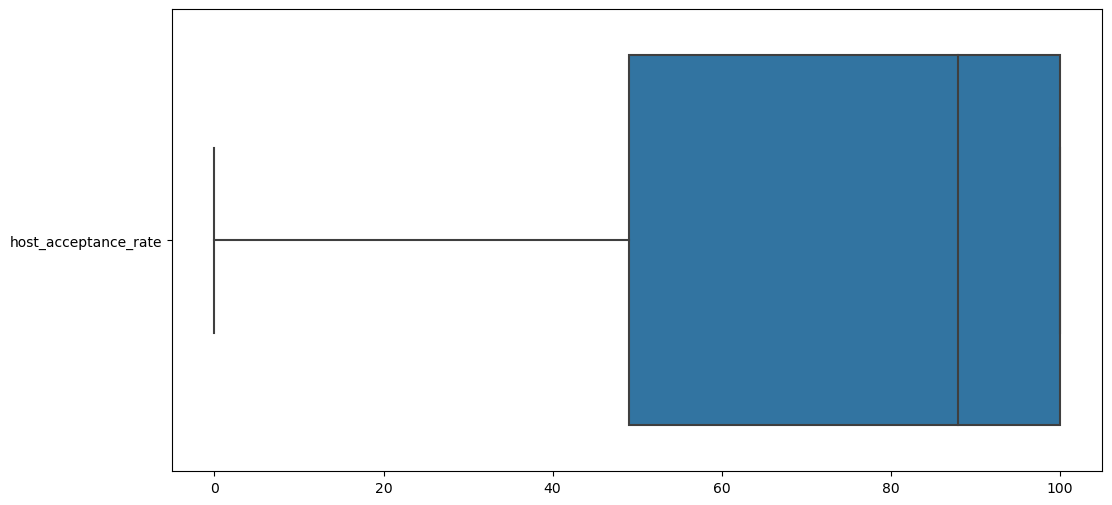

In [38]:
#Plot out the distributions of host response rate
f = plt.figure(figsize=(12,6))
sb.boxplot(data = cleanedDF, orient = 'h')

INSIGHTS: This time, we see a wider distribution of acceptance rate as compared to response rate, with a median of 88%. Also, at the 1st quartile, the acceptance rate is only 49%.

---
### 7. EDA on host_is_superhost
<b>host_is_superhost</b>: A binary variable indicating if the host is a superhost.


In [39]:
superHostDF = airDF["host_is_superhost"].copy()
superHostDF.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3035 entries, 0 to 3034
Series name: host_is_superhost
Non-Null Count  Dtype 
--------------  ----- 
3034 non-null   object
dtypes: object(1)
memory usage: 23.8+ KB


In [40]:
superHostDF.shape

(3035,)

There is one null value, so drop that 1 null value

In [41]:
cleanedSuperHostDF = superHostDF.dropna()
print("Statistics of whether a host is a superhost")
cleanedSuperHostDF.value_counts()


Statistics of whether a host is a superhost


f    2811
t     223
Name: host_is_superhost, dtype: int64

<AxesSubplot:xlabel='host_is_superhost', ylabel='Count'>

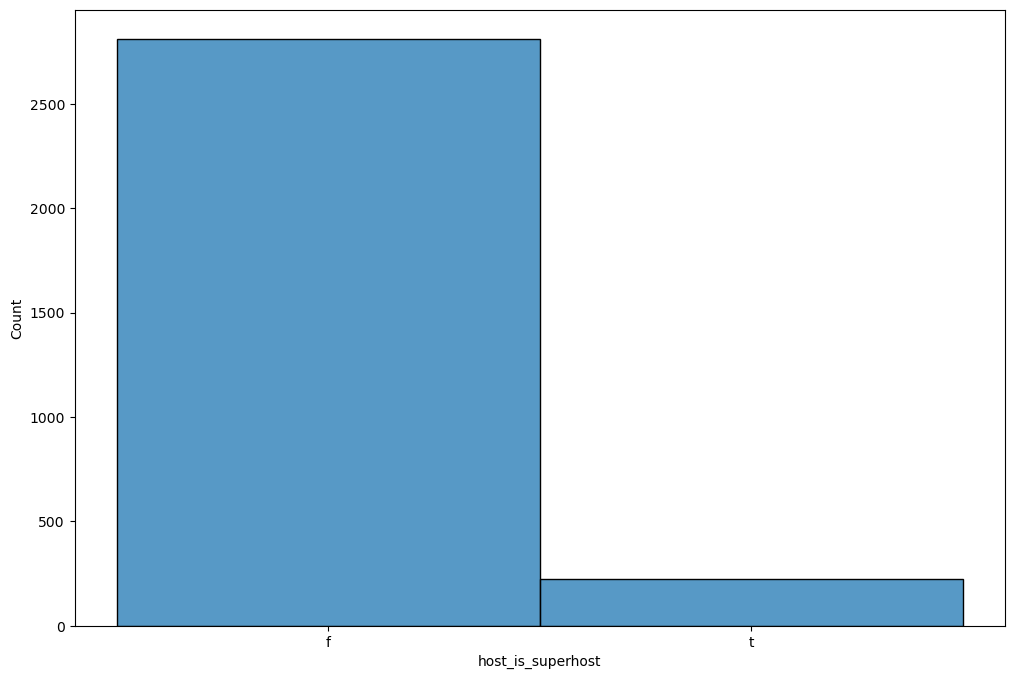

In [42]:
f = plt.figure(figsize=(12,8))
sb.histplot(data = cleanedSuperHostDF)

---
### Try to find relationship between host_is_superhost and listing price
<b>host_is_superhost</b>: A binary variable indicating if a host is a superhost  
<b>price</b>: The listed price of the property

Let us see if there's a relation between a host being a superhost and the price he lists his properties for, to see if being a superhost commands a higher price listing

In [43]:
#remove all the unwanted columns while keeping "host_is_superhost" & "reviews_rating" & "number of reviews"
superHostPriceDF = pd.concat([cleanedSuperHostDF, airDF["price"].copy()], axis = 1).reindex(cleanedSuperHostDF.index)
#Drop any NA values
superHostPriceDF.dropna()
#Do some data cleaning and remove price
superHostPriceDF["price"] = superHostPriceDF["price"].str.replace('$', '', regex= True).str.replace(',', '', regex = True).astype(float)

In [44]:
superHostPriceDF = removeOutliers(superHost_true_df,"price")
sb.boxplot(x = "host_is_superhost", y = "price", data = superHostPriceDF)

NameError: name 'removeOutliers' is not defined

 ##### INSIGHT : It's worth noting that while superhost status can be an indicator of a quality listing, the median of a super host's listing is actually lower than those who are not super hosts, and the quartiles are much more compact. Hence, we will not use this variable for our predictions.

---
### 8. EDA on host_verifications
<b>host_verifications</b>: A list of verification methods that the host has completed.


In [ ]:
verificationDF = pd.DataFrame(airDF["host_verifications"])
verificationDF

,host_verifications
0,"['email', 'phone']"
1,"['email', 'phone']"
2,"['email', 'phone']"
3,"['email', 'phone']"
4,"['email', 'phone']"
...,...
3030,['phone']
3031,"['email', 'phone']"
3032,"['email', 'phone', 'work_email']"
3033,"['email', 'phone']"


In [ ]:
verificationDF.describe()

,host_verifications
count,3035
unique,6
top,"['email', 'phone']"
freq,2555


In [ ]:
#Find the number of null values as there seems to be alot.
print("Total Values: {0}, Null Values: {1}".format(len(verificationDF), verificationDF.isna().sum().sum()))

Total Values: 3035, Null Values: 0


We can see that the verifications follow a certain order, and can be represented into an int, so we shall just take the len and convert it to a numerical variable so we can compare it with other variables

In [ ]:
intVerificationDF = verificationDF.copy()
#Replace all with the integer variant
count = 0
for x in intVerificationDF["host_verifications"]:   
    #Convert string into list
    l = list(x.split(","))
    intVerificationDF["host_verifications"][count] = (len(l))
    count += 1

intVerificationDF

,host_verifications
0,2
1,2
2,2
3,2
4,2
...,...
3030,1
3031,2
3032,3
3033,2


In [ ]:
intVerificationDF.describe()

,host_verifications
count,3035
unique,3
top,2
freq,2558


In [ ]:
intVerificationDF.value_counts()

host_verifications
2                     2558
3                      300
1                      177
dtype: int64

<AxesSubplot:ylabel='Count'>

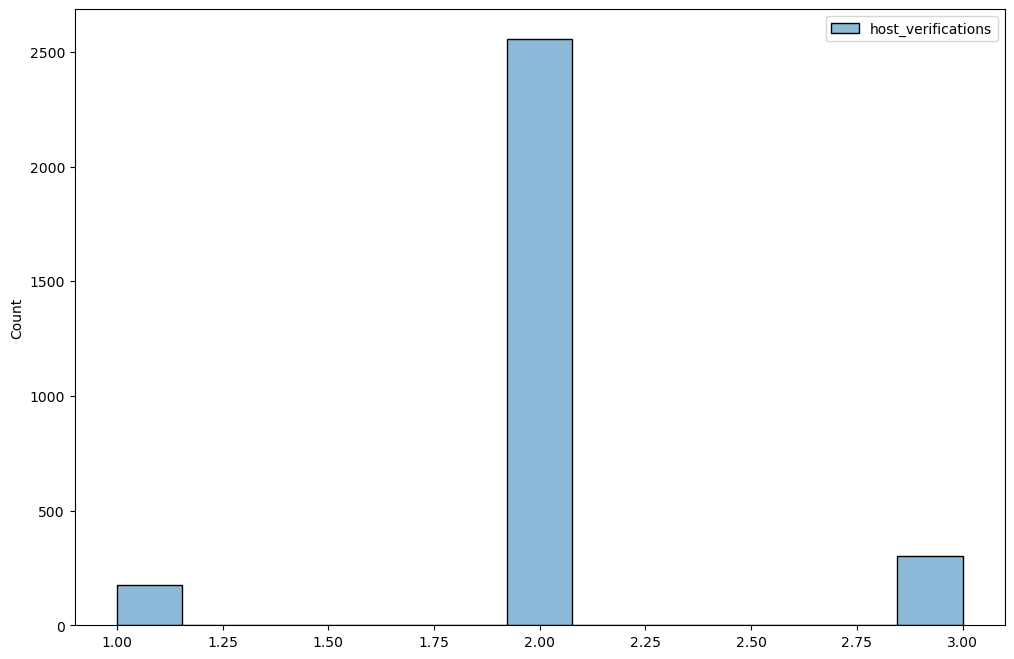

In [ ]:
f = plt.figure(figsize=(12,8))
sb.histplot(data = intVerificationDF)

INSIGHTS: We can see that majority of hosts (2558) are verified through phone and email, and therefore we will not use this data as it is very heavily skewed and will provide us little insight for our prediction.